# Second version

In [35]:
import feature_selection_RL_V2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [36]:
#Data processing

datContent = [i.strip().split() for i in open("australian_data.dat").readlines()]
import csv
# write it as a new CSV file
with open("australian_data.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

australian_data = pd.read_csv('australian_data.csv', sep=',', header=None)
australian_data.rename(columns={14: 'label'}, inplace=True)
X = australian_data.drop('label', axis=1)
y = australian_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [37]:
#Simulation
feature_number: int = 14

print('---------- AOR init ----------')
aor: list = [np.zeros(feature_number), np.zeros(feature_number)]
print(aor)

print('---------- Process init ----------')
feature_selection_process = feature_selection_RL_V2.FeatureSelectionProcessV2(feature_number, .1, .1, .99, aor, {})
print(feature_selection_process)

print('---------- The process has been successfully init ----------')

---------- AOR init ----------
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
---------- Process init ----------
FeatureSelectionProcessV2(nb_of_features=14, eps=0.1, alpha=0.1, gamma=0.99, aor=[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])], feature_structure={})
---------- The process has been successfully init ----------


In [38]:
nb_iter: int = 20
nb_explored: list = []
explored: int = 0

In [39]:
for it in range(nb_iter):

    print(f'Current state selection {it} ---------')
    current_state = feature_selection_process.start_from_empty_set()

    while current_state.number[0] <= 13:

        #We get the reward of the state
        if current_state.reward == 0:
            current_state.get_reward(X_train, y_train, X_test, y_test)
        print(current_state)

        #We chose the next state
        return_next_action_state = current_state.select_action(feature_selection_process.feature_structure, feature_selection_process.eps, feature_selection_process.aor)
        next_state, next_action = return_next_action_state[1], return_next_action_state[0]

        if current_state.nb_visited == 0:
            explored += 1
                    
        #We update the v_value of the state
        current_state.update_v_value(feature_selection_process.alpha, feature_selection_process.gamma, next_state.v_value)
        
        #We update the aor table
        next_action.get_aorf(feature_selection_process.aor)

        #Add the state to the research tree
        feature_selection_process.add_to_historic(current_state)

        current_state = next_state
        
    nb_explored.append(explored)

results = feature_selection_process.get_final_aor_sorted()

Current state selection 0 ---------
State(number=[0, 0], description=[], v_value=0, reward=0.8728070175438597, nb_visited=0)
State(number=[1, 0], description=[13], v_value=0, reward=0.8552631578947368, nb_visited=0)
State(number=[2, 0], description=[13, 6], v_value=0, reward=0.8728070175438597, nb_visited=0)
State(number=[3, 0], description=[13, 6, 5], v_value=0, reward=0.8596491228070176, nb_visited=0)
State(number=[4, 0], description=[13, 6, 5, 3], v_value=0, reward=0.8596491228070176, nb_visited=0)
State(number=[5, 0], description=[13, 6, 5, 3, 4], v_value=0, reward=0.868421052631579, nb_visited=0)
State(number=[6, 0], description=[13, 6, 5, 3, 4, 10], v_value=0, reward=0.8596491228070176, nb_visited=0)
State(number=[7, 0], description=[13, 6, 5, 3, 4, 10, 1], v_value=0, reward=0.8771929824561403, nb_visited=0)
State(number=[8, 0], description=[13, 6, 5, 3, 4, 10, 1, 7], v_value=0, reward=0.868421052631579, nb_visited=0)
State(number=[9, 0], description=[13, 6, 5, 3, 4, 10, 1, 7, 9]

IndexError: list index out of range

In [21]:
feature_selection_process.feature_structure

{0: [State(number=[0, 0], description=[], v_value=0.4276315789473684, reward=0.8552631578947368, nb_visited=1)],
 1: [State(number=[1, 0], description=[2], v_value=0.4342105263157895, reward=0.868421052631579, nb_visited=1)],
 2: [State(number=[2, 0], description=[2, 1], v_value=0.42105263157894735, reward=0.8421052631578947, nb_visited=1)],
 3: [State(number=[3, 0], description=[2, 1, 10], v_value=0.4232456140350877, reward=0.8464912280701754, nb_visited=1)],
 4: [State(number=[4, 0], description=[2, 1, 10, 6], v_value=0.4298245614035088, reward=0.8596491228070176, nb_visited=1)],
 5: [State(number=[5, 0], description=[2, 1, 10, 6, 3], v_value=0.4298245614035088, reward=0.8596491228070176, nb_visited=1)],
 6: [State(number=[6, 0], description=[2, 1, 10, 6, 3, 11], v_value=0.4298245614035088, reward=0.8596491228070176, nb_visited=1)],
 7: [State(number=[7, 0], description=[2, 1, 10, 6, 3, 11, 9], v_value=0.43201754385964913, reward=0.8640350877192983, nb_visited=1)],
 8: [State(number=

In [25]:
results

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
 array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]),
 (0.19336842105263163,
  0.22695099415204678,
  0.2296359602339182,
  0.22645888538011696,
  0.22703069356725145,
  0.22670613567251463,
  0.22831186783625734,
  0.22788514385964911,
  0.22606554853801172,
  0.22946794970760234,
  0.22931140233918135,
  0.22782782807017546,
  0.23193666081871345,
  0.22651519883040935),
 array([ 0,  8,  3, 13,  5,  1,  4, 11,  7,  6, 10,  9,  2, 12])]

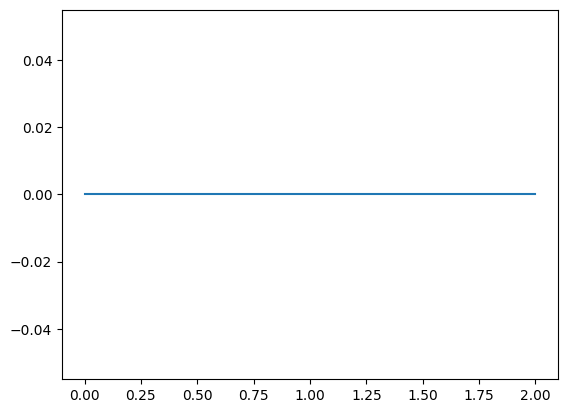

In [26]:
plt.plot([i for i in range(len(nb_explored))], nb_explored)

In [41]:
#Five first  [ 0,  5,  1, 13,  9, 12,  7,  6,  8,  3,  2, 10,  4, 11] --> 0.828

#Four randomly picked first  [13, 11,  0,  3, 10,  7,  2,  6,  8,  9,  4, 12,  5,  1] --> 0.671
#Four initial state picked first [ 3, 11,  5, 13,  6,  8,  0,  4,  9,  2, 10, 12,  1,  7] --> 0.846
#Four initial state picked first [ 1,  9,  2,  8,  4,  3, 10,  5, 11,  7, 13,  0, 12,  6] --> 0.776
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train[[ 13,  0, 12,  6]], y_train)
accuracy: float = clf.score(X_test[[13,  0, 12,  6]], y_test)

In [42]:
accuracy

0.7763157894736842

In [14]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = RandomForestClassifier(max_depth=2)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

In [16]:
selector.score(X_test, y_test)

0.8640350877192983